<a href="https://colab.research.google.com/github/lsmith01t/PROJECT_2/blob/main/Project2v1.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier


In [93]:
df_1 = pd.read_csv('adult.csv')
df_1_ml = df_1.copy()

#Data Set 1 Adult Income Dataset

## 1.This data was obtained from Kaggles website. 
The data source can be located here: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Acknowledgements:
This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

##2.The target of my project will be to predict if the income of each person is in one of two classes. Greater than 50K or not.  
 

In [94]:
df_1_ml.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [95]:
#With this step I can verify that we have no null fields. I can also verify the data field type. I can see there are none.
df_1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [96]:
#This will allow me to identify if there are duplicate values in the data. I can see that there are 52
print(df_1_ml.duplicated().value_counts())



False    48790
True        52
dtype: int64


In [97]:
#look at the values of all objects to see if necessary to adjust. 
for o in df_1_ml.select_dtypes(object):
  print(df_1_ml[o].value_counts())
  print('\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64


HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64


Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64


Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

In [98]:
df_1_ml.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

Upon review of the unique fields I see opportunities to drop columns that will not aid in the prediction of the class.

The best candidate to eliminate will be "fnlwgt', this factor does not add predictive value and substantially increases the feature complication. 

I also believe the captial gain and capital loss columns can be removed. 

It appears the education and educational num are associated with each other and therefore I can eliminate education for the the classification exercise. 

Age presents an opportunity to bin ages into 4 or 5 groups. 

In [99]:
df_1_ml['age'] = df_1_ml['age'].apply(lambda x: 'young' if x < 30 else 'distinguished')

In [100]:
df_1_ml.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss', 'education'], inplace=True)
df_1_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  object
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   hours-per-week   48842 non-null  int64 
 9   native-country   48842 non-null  object
 10  income           48842 non-null  object
dtypes: int64(2), object(9)
memory usage: 4.1+ MB


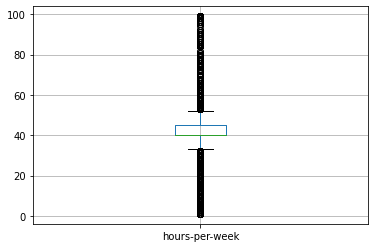

In [103]:
df_1_ml.boxplot(column = 'hours-per-week');

In [ ]:

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()

num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

processor = make_column_transformer(num_tuple,cat_tuple)
processor.fit(df_1_ml)
array_processed = processor.transform(df_1_ml)
df_processed = pd.DataFrame(array_processed)
df_processed.head()

In [ ]:
corr_1_ml = df_processed.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr_1_ml, cmap = "Oranges");


Upon reviewing the correlation amoung features after transformation, it cannot be confirmed if there is correlation. 

#Data Set 2 Credit Card Customer Prediction Dataset

##1. The data was downloaded from Kaggle. 

The data was found here: https://leaps.analyttica.com/home [Date Retrieved] from https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction

##2. The data is a collection of humans that are or were customers of a credit card company. 

##3. The target will be the "Atrrition_Flag" column. The objective will be to predict if customers will leave the company based on various features. 

##4. Each row represents one person in the study. 

##5. This is a classification problem. 

##6. The data has 23 features. 

##7. There are 10,127 rows. 

##8. The largest concern with the data is number of customers that churn. This is a small group of overall number and may not be a strong representation to predict attrition. 


In [ ]:
#This will drop all the duplicate rows and then verify they have been dropped. 
df_1_ml.drop_duplicates(inplace=True)
print(df_1_ml.duplicated().value_counts())

In [ ]:
df_2 = pd.read_csv('BankChurners.csv')
df_2_ml = df_2.copy()

In [ ]:
df_2_ml.head()

In [ ]:
#can verify here if the data is missing values and if the data types are incorrect. Dropping the last two columns as these are calculations from someone elses work and I don't want them to skew the data. 
df_2_ml.info()
df_2_ml = df_2_ml.drop(columns ='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')
df_2_ml = df_2_ml.drop(columns ='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')

In [ ]:
#verifying the columns were dropped. 
df_2_ml.info()

In [ ]:
#Here I can search for duplicate values. I can see there are none.
print(df_2_ml.duplicated().value_counts())

In [ ]:
#Here I can verify all the data values in the Objects columns are correct and there are no inconsistent values. 

print(df_2_ml['Attrition_Flag'].value_counts())
print(df_2_ml['Gender'].value_counts())
print(df_2_ml['Education_Level'].value_counts())
print(df_2_ml['Marital_Status'].value_counts())
print(df_2_ml['Income_Category'].value_counts())
print(df_2_ml['Card_Category'].value_counts())

In [ ]:
df_2_ml.boxplot(column = 'CLIENTNUM');

In [ ]:
df_2_ml.boxplot(column = 'Customer_Age');

In [ ]:
df_2_ml.boxplot(column = 'Dependent_count');

In [ ]:
df_2_ml.boxplot(column = 'Months_on_book');

In [ ]:
df_2_ml.boxplot(column = 'Total_Relationship_Count');

In [ ]:
df_2_ml.boxplot(column = 'Months_Inactive_12_mon');

In [ ]:
df_2_ml.boxplot(column = 'Contacts_Count_12_mon');

In [ ]:
df_2_ml.boxplot(column = 'Total_Revolving_Bal');

In [ ]:
df_2_ml.boxplot(column = 'Avg_Open_To_Buy');

In [ ]:
df_2_ml.boxplot(column = 'Total_Amt_Chng_Q4_Q1');

In [ ]:
df_2_ml.boxplot(column = 'Total_Trans_Amt');

In [ ]:
df_2_ml.boxplot(column = 'Total_Trans_Ct');

In [ ]:
df_2_ml.boxplot(column = 'Total_Ct_Chng_Q4_Q1');

In [ ]:
df_2_ml.boxplot(column = 'Avg_Utilization_Ratio');

In [ ]:

cat_selector2 = make_column_selector(dtype_include='object')
num_selector2 = make_column_selector(dtype_include='number')


num_tuple2 = (scaler, num_selector2)
cat_tuple2 = (ohe, cat_selector2)

processor2 = make_column_transformer(num_tuple2,cat_tuple2)
processor.fit(df_2_ml)
array_processed2 = processor.transform(df_2_ml)
df_processed2 = pd.DataFrame(array_processed)
df_processed2.head()

In [ ]:
corr_2_ml = df_processed2.corr()
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr_2_ml, cmap = "Oranges");

Upon review of the heat map you can clearly see that there are some data points where a high correlation was found. More code need to be written to lable the x and y axis data points so I can identify what these are in my data set. I will have to inquiry how to do this in code review as TA's are off today. 